In [2]:
import osmnx as ox

import networkx as nx

import geopandas as gpd

import matplotlib.pyplot as plt

import pandas as pd

place_name = "Richmond, California, USA"

graph = ox.graph_from_place(place_name, network_type='drive')



In [3]:
ox.io.save_graphml(graph,"./data/"+place_name)


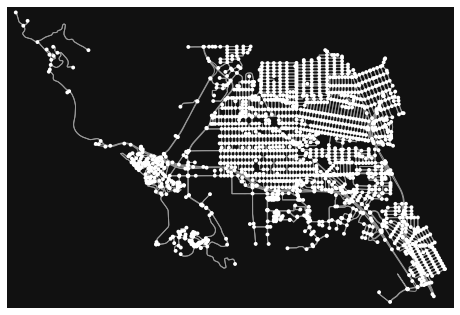

In [4]:
fig, ax = ox.plot_graph(ox.project_graph(graph))

In [5]:
graph_proj = ox.project_graph(graph)
nodes_proj, edges_proj = ox.graph_to_gdfs(graph_proj, nodes=True, edges=True)

In [6]:
edges_proj

osmid  oneway  \
u          v          key                                            
26819598   57796266   0              [392522261, 22374918]    True   
           57796265   0    [683979836, 22375686, 22375687]    True   
57796266   57815149   0                           22375351   False   
           57796265   0                          392522264    True   
           57789935   0                          575450764   False   
...                                                    ...     ...   
7624153279 7624160216 0                          750217910   False   
7624160217 7624160218 0                          816336665   False   
           7624160220 0                          816336667   False   
           7624160219 0                          816336667   False   
7624160220 7624160217 0                          816336667   False   

                                 highway   length lanes  \
u          v          key                                 
26819598   57796266   0    motorway_link  389.480     2   
           57796265   0         motorway  689.419     4   
57796266   57815149   0        secondary   29.713   NaN   
           57796265   0    motorway_link  299.893   NaN   
           57789935   0        secondary   68.844   NaN   
...                                  ...      ...   ...   
7624153279 7624160216 0      residential   13.822   NaN   
7624160217 7624160218 0      residential   38.421   NaN   
           7624160220 0      residential   14.134   NaN   
           7624160219 0      residential   38.376   NaN   
7624160220 7624160217 0      residential   14.134   NaN   

                                                                    geometry  \
u          v          key                                                      
26819598   57796266   0    LINESTRING (560392.143 4195387.129, 560411.093...   
           57796265   0    LINESTRING (560392.143 4195387.129, 560567.866...   
57796266   57815149   0    LINESTRING (560556.372 4195035.083, 560529.679...   
           57796265   0    LINESTRING (560556.372 4195035.083, 560571.092...   
           57789935   0    LINESTRING (560556.372 4195035.083, 560578.955...   
...                                                                      ...   
7624153279 7624160216 0    LINESTRING (556641.798 4197110.405, 556641.615...   
7624160217 7624160218 0    LINESTRING (556719.814 4197124.736, 556681.316...   
           7624160220 0    LINESTRING (556719.814 4197124.736, 556719.736...   
           7624160219 0    LINESTRING (556719.814 4197124.736, 556720.024...   
7624160220 7624160217 0    LINESTRING (556719.736 4197110.633, 556719.814...   

                            ref               name maxspeed bridge junction  \
u          v          key                                                     
26819598   57796266   0     NaN                NaN      NaN    NaN      NaN   
           57796265   0    I 80  Eastshore Freeway   65 mph    yes      NaN   
57796266   57815149   0     NaN     Central Avenue   30 mph    NaN      NaN   
           57796265   0     NaN                NaN      NaN    NaN      NaN   
           57789935   0     NaN     Central Avenue   30 mph    NaN      NaN   
...                         ...                ...      ...    ...      ...   
7624153279 7624160216 0     NaN      Seawind Drive      NaN    NaN      NaN   
7624160217 7624160218 0     NaN      Mast Cove Way      NaN    NaN      NaN   
           7624160220 0     NaN     Estuary Street      NaN    NaN      NaN   
           7624160219 0     NaN     Estuary Street      NaN    NaN      NaN   
7624160220 7624160217 0     NaN     Estuary Street      NaN    NaN      NaN   

                          access tunnel  
u          v          key                
26819598   57796266   0      NaN    NaN  
           57796265   0      NaN    NaN  
57796266   57815149   0      NaN    NaN  
           57796265   0      NaN    NaN  
           57789935   0      NaN    NaN  
...        

C:\Users\yunus\anaconda3\envs\geo_env\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)


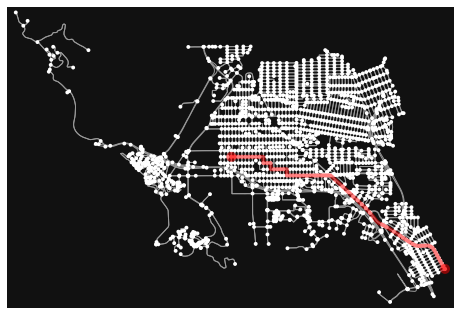

In [7]:
from shapely.geometry import box
bbox = box(*edges_proj.unary_union.bounds)
orig_point = bbox.centroid
nodes_proj['x'] = nodes_proj.x.astype(float)
maxx = nodes_proj['x'].max()
target_loc = nodes_proj.loc[nodes_proj['x']==maxx, :]
target_point = target_loc.geometry.values[0]
orig_xy = (orig_point.y, orig_point.x)
target_xy = (target_point.y, target_point.x)
orig_node = ox.get_nearest_node(graph_proj, orig_xy, method='euclidean')
target_node = ox.get_nearest_node(graph_proj, target_xy, method='euclidean')
o_closest = nodes_proj.loc[orig_node]
t_closest = nodes_proj.loc[target_node]
od_nodes = gpd.GeoDataFrame([o_closest, t_closest], geometry='geometry', crs=nodes_proj.crs)


route = nx.shortest_path(G=graph_proj, source=orig_node, target=target_node, weight='length')


fig, ax = ox.plot_graph_route(graph_proj, route)


In [8]:
import time

t_start = time.process_time()

for _ in range(0,10):
    route = nx.shortest_path(G=graph_proj, source=orig_node, target=target_node, weight='length')

t_end = time.process_time()

(t_end-t_start)/10


0.0296875